In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import r2_score,classification_report,accuracy_score, confusion_matrix
%matplotlib inline

In [2]:
png = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

# Classification

In [5]:
png.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [53]:
png

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,Female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,Male
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.504878,14.982114,217.186992,5076.016260,Male
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female


In [6]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [8]:
png.sex.fillna(png.sex.mode()[0],inplace = True)

In [9]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Male


In [10]:
png.iloc[3] = png.iloc[3].fillna(png.groupby("species").mean().loc["Adelie"])

In [11]:
png.iloc[339] = png.iloc[339].fillna(png.groupby("species").mean().loc["Gentoo"])

In [12]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [17]:
png_u = png.groupby("species").island.value_counts().unstack().fillna(0)

In [18]:
png_u

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,0.0,68.0,0.0
Gentoo,124.0,0.0,0.0


<AxesSubplot:xlabel='Number of species on different islands'>

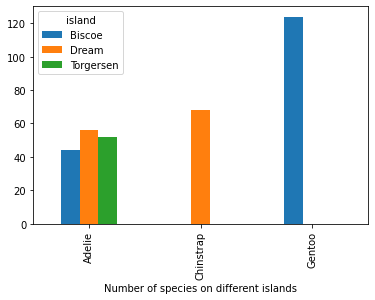

In [20]:
png_u.plot(kind="bar",xlabel = "Number of species on different islands")

C:\Users\Berk\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


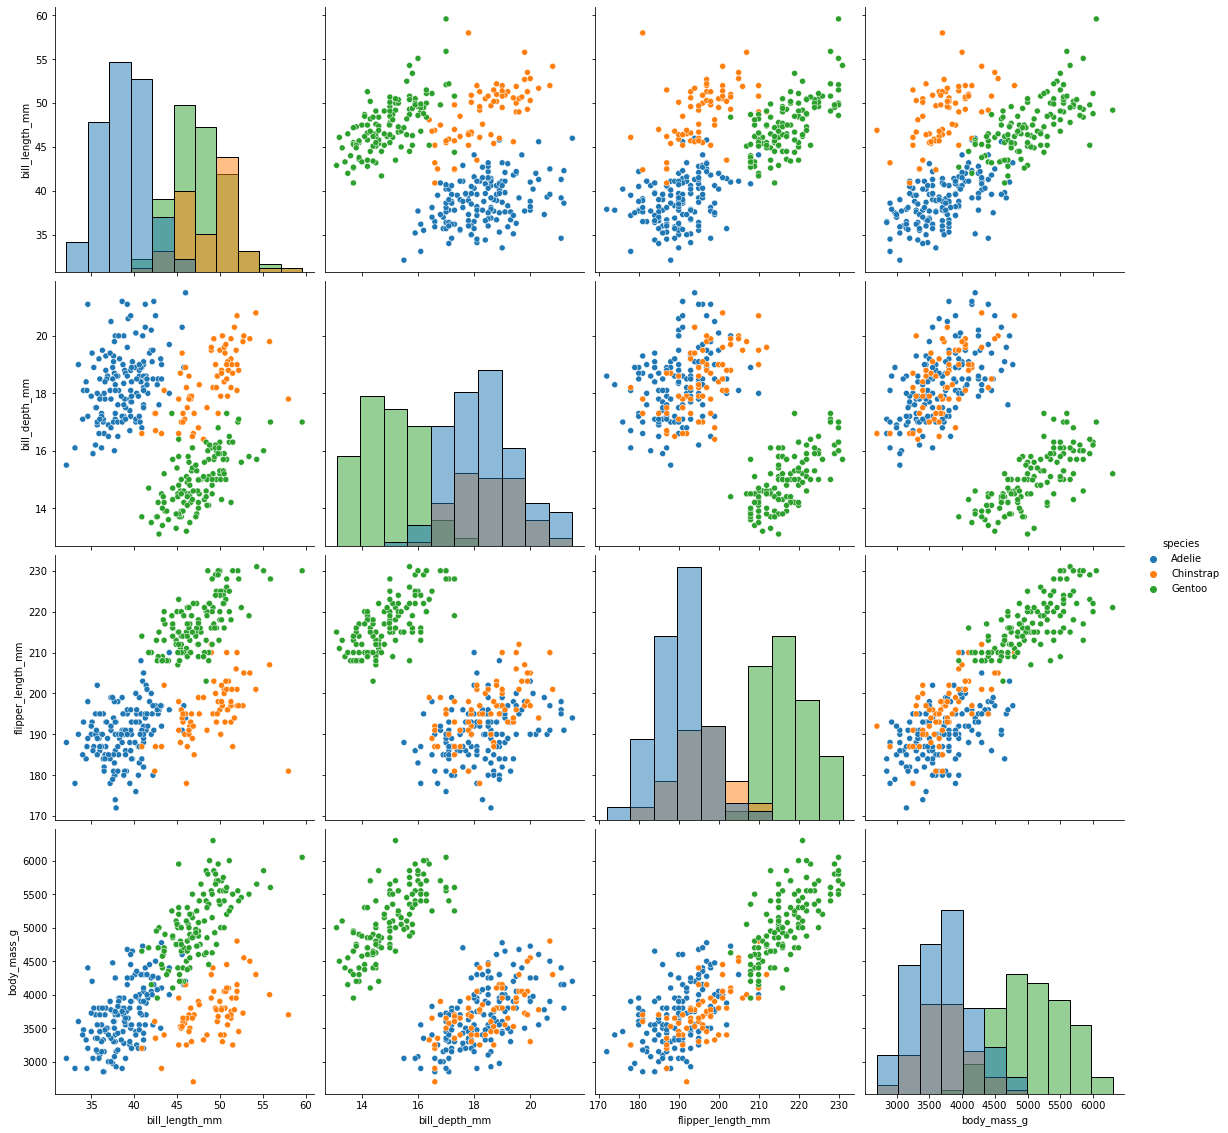

In [22]:
sns.pairplot(png, hue="species", size=4,diag_kind="hist");


<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

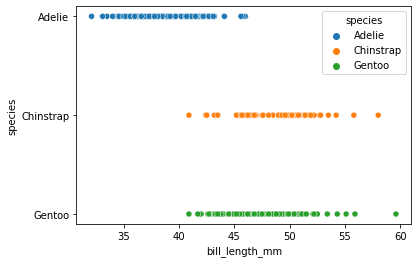

In [65]:
sns.scatterplot(x="bill_length_mm",y ="species",hue="species",data = png)

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

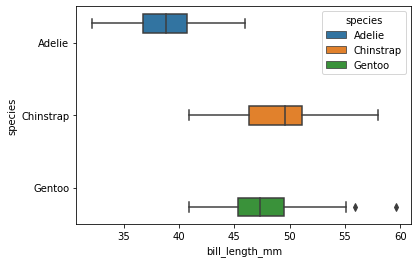

In [66]:
sns.boxplot(x="bill_length_mm",y="species",hue="species",data=png)

In [27]:
dummy_data = pd.get_dummies(png[["island","sex"]])
png_final = pd.concat([png,dummy_data],axis=1)
png_final.drop(["island","sex"],axis=1,inplace=True)

In [54]:
X = png_final.drop("species",axis=1)
y = png_final.species
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42,shuffle=True)

In [55]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [56]:
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [64]:
png_final

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.100000,18.700000,181.000000,3750.000000,0,0,1,0,1
1,Adelie,39.500000,17.400000,186.000000,3800.000000,0,0,1,1,0
2,Adelie,40.300000,18.000000,195.000000,3250.000000,0,0,1,1,0
3,Adelie,38.791391,18.346358,189.953642,3700.662252,0,0,1,0,1
4,Adelie,36.700000,19.300000,193.000000,3450.000000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,47.504878,14.982114,217.186992,5076.016260,1,0,0,0,1
340,Gentoo,46.800000,14.300000,215.000000,4850.000000,1,0,0,1,0
341,Gentoo,50.400000,15.700000,222.000000,5750.000000,1,0,0,0,1
342,Gentoo,45.200000,14.800000,212.000000,5200.000000,1,0,0,1,0


In [63]:
rf.feature_importances_

array([0.35016099, 0.13075533, 0.23577058, 0.10710178, 0.07301755,
       0.08154674, 0.0143067 , 0.00461301, 0.00272734])

In [ ]:
plt.barh(png_f.co)

In [35]:
print(f"Accuracy score of decision tree model :{accuracy_score(y_pred_dt,y_test)}")

Accuracy score of decision tree model :0.9711538461538461


In [36]:
print(f"Accuracy score of random forest model :{accuracy_score(y_pred_rf,y_test)}")

Accuracy score of random forest model :1.0


Random forest model resulted in a perfect classification!

In [38]:
print(f"Confusion matrix of decision tree model: {confusion_matrix(y_pred_dt,y_test)}")

Confusion matrix of decision tree model: [[48  0  0]
 [ 2 20  1]
 [ 0  0 33]]


In [39]:
print(f"Confusion matrix of random forest model: {confusion_matrix(y_pred_rf,y_test)}")

Confusion matrix of random forest model: [[50  0  0]
 [ 0 20  0]
 [ 0  0 34]]


# Regression

In [40]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


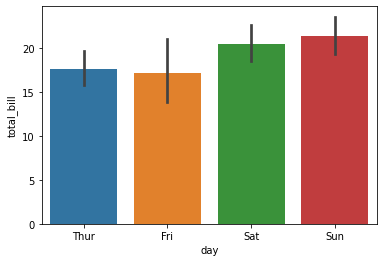

In [41]:
sns.barplot(x="day", y="total_bill", data=tips);


<AxesSubplot:xlabel='time', ylabel='total_bill'>

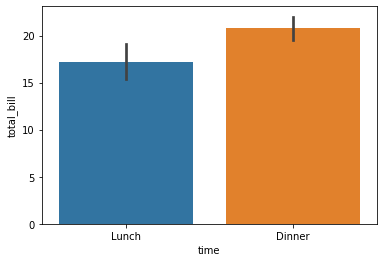

In [42]:
sns.barplot(x="time", y="total_bill", data=tips)


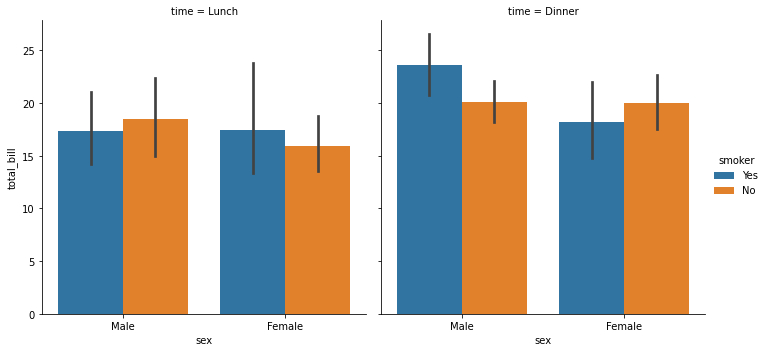

In [43]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar");


In [44]:
dummy_data = pd.get_dummies(tips[["sex","smoker","day","time"]])
tips_final = pd.concat([tips,dummy_data],axis=1)

In [46]:
tips_final.drop(["sex","smoker","day","time"],axis=1,inplace=True)
X = tips_final.drop("total_bill",axis=1)
y = tips_final["total_bill"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=42,shuffle=True)

In [48]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [49]:
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [51]:
print(f"R2 score of decision tree model : {r2_score(y_test,y_pred_dt)}")

R2 score of decision tree model : 0.0803097325857759


In [52]:
print(f"R2 score of random forest model : {r2_score(y_test,y_pred_rf)}")

R2 score of random forest model : 0.35884322408482827
